# Data Analysis of Pew Research Center's Teen Dating Survey 

* This notebook analyzes data to answer five questions relevant to our final project.

* Link to data: https://www.pewresearch.org/internet/dataset/september-2014-march-2015-teens/ 
    From 9/25/14 to 10/9/14 and from 2/10/15 to 3/6/15 Pew Research Center collected data from more than 1600 parents and children asking them a wide variety of questions revolving around technology, social media, dating, and friendships. The dataset also contains demographic information about the respondents.



In [1]:
import pandas as pd
from IPython.display import HTML, Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Question 1: What methods of breaking up do teenagers find appropriate?

### Steps:
* Create a dataframe with the relevant information
* Plot the responses to the questions

### Code:

In [7]:
# I merged two data frames to answer this question. My section of the large original dataset does not include dating questions
# that are relevant to our overall topic. 
cdating_df = pd.read_csv('../data/Joy_Clean_Teen_Dating.csv')
mason_df = pd.read_csv('../data/Mason_Clean_Teen_Dating.csv')



<div class="alert alert-info">

* Modified the step 1 notebooks to keep the `CaseID` in Mason's subset, which you renamed as `ID`. This makes it easier to do the merge without having to assume the rows stay in the same order.
    
</div>


In [8]:
cdating_df.head()

,ID,DT2_A,DT2_B,DT2_C,DT2_D,DT2_E,DT2_F,DT2_G,DT2_H,DT2_I,...,Parent_Metro,Parent_Internet,Sexuality_Long,Child_Gen_Long,Parent_Gen_Long,Transgender_Long,Parent_HOH_Long,Parent_Metro_Long,Parent_Rent_Long,Parent_Internet_Long
0,5,3,2,3,3,3,3,3,3,3,...,1.0,1.0,Straight,Female,Female,No,Yes,Metro,Rent,Yes
1,9,,,,,,,,,,...,1.0,1.0,Straight,Male,Male,No,Yes,Metro,Own,Yes
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pinterest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,,,,,,,,,,...,1.0,1.0,NaN,Female,Female,NaN,No,Metro,Rent,Yes


In [9]:
mason_df.head()

,CaseID,hear_frequency,hear_from_you_frequency,sm_feel_connected,sm_feel_closer,sm_feel_jealous,sm_show_care,sm_different,sm_authentic,sm_escape,...,blocked_ex_text,sig_other_checked_internet,sig_other_read_texts,sig_other_remove_ex,sig_other_put_down,sig_other_demand_pw,sig_other_harass_internet,sig_other_internet_sexually,sig_other_rumors_internet,sig_other_threaten_internet
0,5,4,2,2,3,3,3,2,3,2,...,2,3,2,3,3,3,3,3,3,3
1,9,,,,,,,,,,...,,,,,,,,,,
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pinterest,1,3,5,1,59,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,,,,,,,,,,...,,,,,,,,,,


In [13]:
# can then use 
# left_on and right_on to identify common column to merge on
merged_df = pd.merge(cdating_df,mason_df, 
                     left_on='ID', right_on='CaseID')
merged_df = merged_df.drop(columns=['DT2_A', 'DT2_B', 'DT2_C', 'DT2_D', 'DT2_E', 'DT2_F', 'DT2_G',
       'DT2_H', 'DT2_I', 'DT4', 'DT4_A'])

In [14]:
# Within the columns relevant to this question, I converted the data types from string to interger to plot more easily. 
merged_df['breakup_text'] = pd.to_numeric(merged_df['breakup_text'],errors='coerce')
merged_df['breakup_inperson'] = pd.to_numeric(merged_df['breakup_inperson'],errors='coerce')
merged_df['breakup_sm_message'] = pd.to_numeric(merged_df['breakup_sm_message'],errors='coerce')
merged_df['breakup_friend'] = pd.to_numeric(merged_df['breakup_friend'],errors='coerce')
merged_df['breakup_sm_status'] = pd.to_numeric(merged_df['breakup_sm_status'],errors='coerce')
merged_df['breakup_phone'] = pd.to_numeric(merged_df['breakup_phone'],errors ='coerce')


##### The following plots show the distribution of responses for different questions.

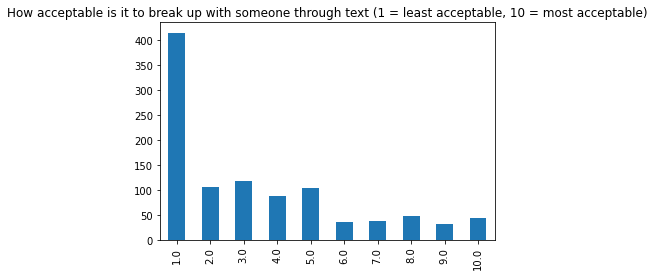

In [16]:
neg_rf = merged_df[['breakup_text', 'breakup_inperson','breakup_phone', 'breakup_sm_message', 'breakup_friend','breakup_sm_status']] == -1.0

# break into two steps
breakup_dist = merged_df[-neg_rf]['breakup_text'].value_counts(sort=True)

# use sort_index to keep the ordering of the response value (1 to 10)
breakup_dist.sort_index().plot(kind = 'bar')
plt.title('How acceptable is it to break up with someone through text (1 = least acceptable, 10 = most acceptable)');

* ANY COMMENTS/OBSERVATIONS ON THIS DISTRIBUTION??

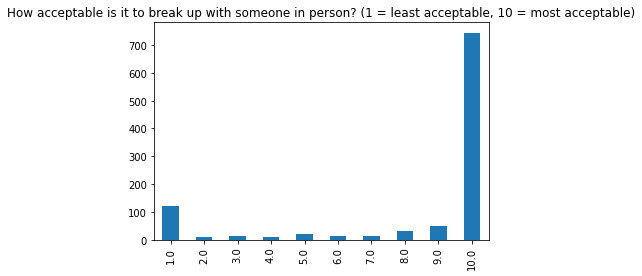

In [23]:
breakup_inperson_dist=merged_df[-neg_rf]['breakup_inperson'].value_counts().sort_index()

# keep the order of the responses 1 to 10
breakup_inperson_dist.plot(kind = 'bar')
plt.title('How acceptable is it to break up with someone in person? (1 = least acceptable, 10 = most acceptable)');


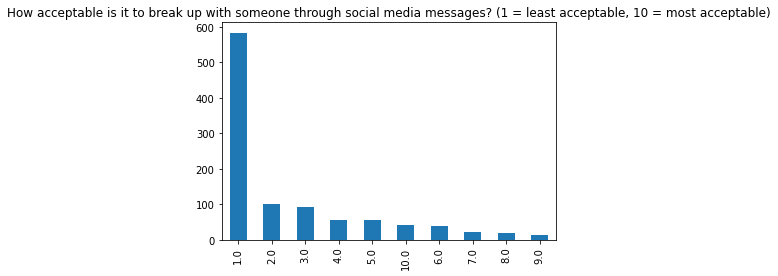

In [6]:
merged_df[-neg_rf]['breakup_sm_message'].value_counts(sort=True).plot(kind = 'bar')
plt.title('How acceptable is it to break up with someone through social media messages? (1 = least acceptable, 10 = most acceptable)');

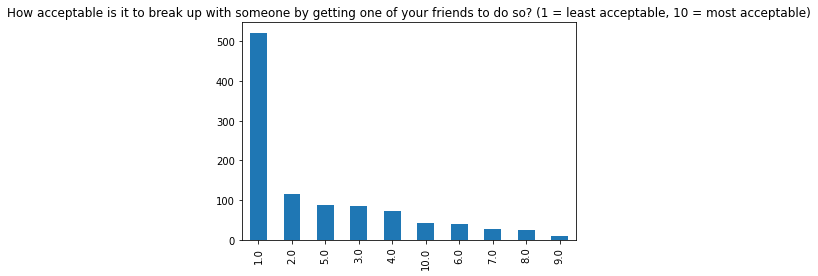

In [7]:
merged_df[-neg_rf]['breakup_friend'].value_counts(sort=True).plot(kind = 'bar')
plt.title('How acceptable is it to break up with someone by getting one of your friends to do so? (1 = least acceptable, 10 = most acceptable)');

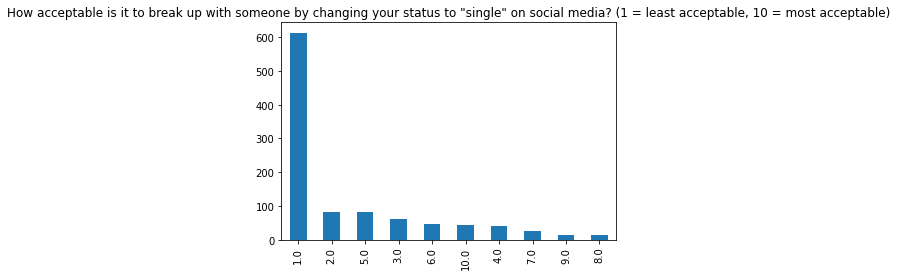

In [8]:
merged_df[-neg_rf]['breakup_sm_status'].value_counts(sort=True).plot(kind = 'bar')
plt.title('How acceptable is it to break up with someone by changing your status to "single" on social media? (1 = least acceptable, 10 = most acceptable)');

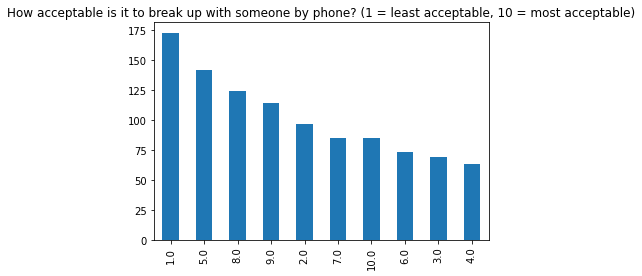

In [9]:
merged_df[-neg_rf]['breakup_phone'].value_counts(sort=True).plot(kind = 'bar')
plt.title('How acceptable is it to break up with someone by phone? (1 = least acceptable, 10 = most acceptable)');

### Answer:
#### The only method of breaking up that teenagers find appropriate is in-person. 

### Observation:
#### For all of the methods except for breaking up with someone by phone most of the teenagers gave a similar response. Interestingly, the second highest response for breaking up with someone by phone was 5. For most of the other questions the second highest response was only one or two numbers away from the highest. 

## Question 2: What methods do teenagers use to break up?

### Steps:
* Create new dataframe with relevant data  
* Convert data types to integer for relevant columns
* Plot responses to question 

### Code:

<div class="alert alert-warning">

* You probably want to do the column renaming in the step one notebook so you just have to do it once and then will have a consistent set of column names for subsequent analysis

</div>

In [10]:
# While attempting to answer this question I noticed that the dataframe that I merged my cleaned dataframe with didn't have
# the right data for certain columns. I created a new dataframe from the original dataset. 
dating_df = pd.read_csv('../data/Teen_Dating_Survey.csv')
q2_df = dating_df[['KR11_A', 'KR11_B','KR11_C','KR11_D','KR11_E','KR11_F','KR11_G','KR11_H','KR11_I','KR11_J','KR11_K','KR12_1','KR12_2','KR12_3']]
q2col_map = {
    'KR11_A':'bu_phone',
    'KR11_B':'bu_inperson',
    'KR11_C':'bu_text',
    'KR11_D': 'bu_sm',
    'KR11_E': 'bu_email',
    'KR11_F': 'bu_fbstatus',
    'KR11_G':'bu_smstatus',
    'KR11_H': 'bu_image',
    'KR11_I': 'bu_drift',
    'KR11_J':'bu_other',
    'KR11_K': 'bu_never',
    'KR12_1': 'dump_phone',
    'KR12_2': 'dump_inperson',
    'KR12_3':'dump_text'
}
q2_df = q2_df.rename(columns=q2col_map)

In [11]:
# Within the columns relevant to this question, I converted the data types from string to interger to plot more easily. 
q2_df['bu_phone'] = pd.to_numeric(q2_df['bu_phone'],errors='coerce')
q2_df['bu_inperson'] = pd.to_numeric(q2_df['bu_inperson'],errors='coerce')
q2_df['bu_text'] = pd.to_numeric(q2_df['bu_text'],errors='coerce')
q2_df['bu_sm'] = pd.to_numeric(q2_df['bu_sm'],errors='coerce')
q2_df['bu_email'] = pd.to_numeric(q2_df['bu_email'],errors ='coerce')
q2_df['bu_fbstatus'] = pd.to_numeric(q2_df['bu_fbstatus'],errors ='coerce')
q2_df['bu_smstatus'] = pd.to_numeric(q2_df['bu_smstatus'],errors ='coerce')
q2_df['bu_image'] = pd.to_numeric(q2_df['bu_image'],errors ='coerce')
q2_df['bu_drift'] = pd.to_numeric(q2_df['bu_drift'],errors ='coerce')
q2_df['bu_other'] = pd.to_numeric(q2_df['bu_other'],errors ='coerce')
q2_df['bu_never'] = pd.to_numeric(q2_df['bu_never'],errors ='coerce')

##### The following plots show the distribution of responses for different questions. 

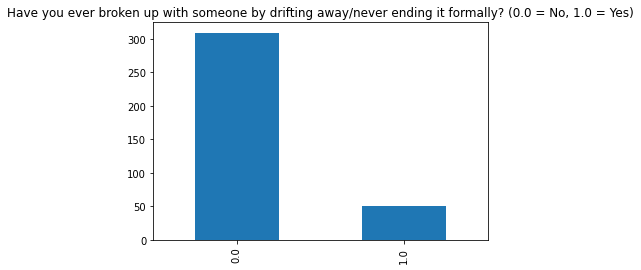

In [12]:
q2_df['bu_drift'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Have you ever broken up with someone by drifting away/never ending it formally? (0.0 = No, 1.0 = Yes)');

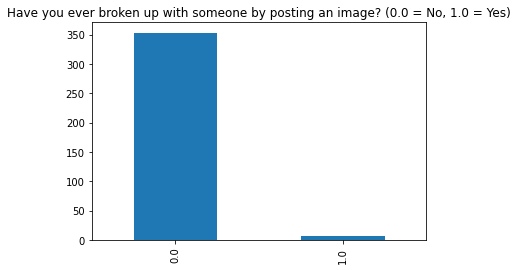

In [13]:
q2_df['bu_image'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Have you ever broken up with someone by posting an image? (0.0 = No, 1.0 = Yes)');

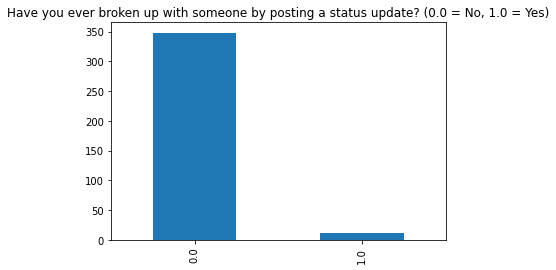

In [14]:
q2_df['bu_smstatus'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Have you ever broken up with someone by posting a status update? (0.0 = No, 1.0 = Yes)');

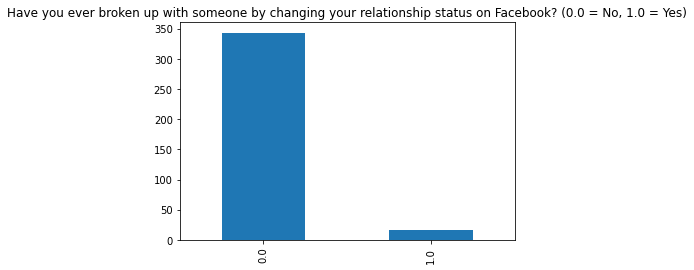

In [15]:
q2_df['bu_fbstatus'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Have you ever broken up with someone by changing your relationship status on Facebook? (0.0 = No, 1.0 = Yes)');

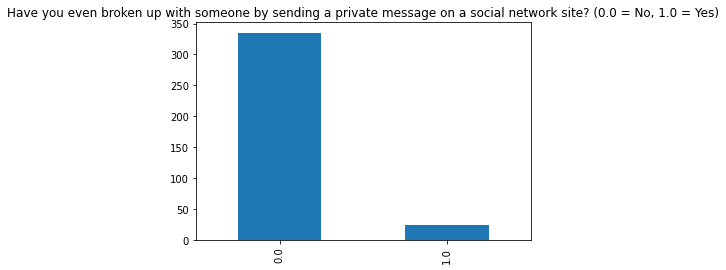

In [16]:
q2_df['bu_sm'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Have you even broken up with someone by sending a private message on a social network site? (0.0 = No, 1.0 = Yes)');

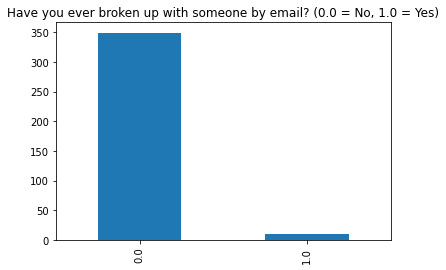

In [17]:
q2_df['bu_email'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Have you ever broken up with someone by email? (0.0 = No, 1.0 = Yes)');

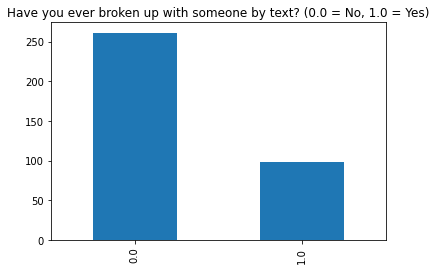

In [18]:
q2_df['bu_text'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Have you ever broken up with someone by text? (0.0 = No, 1.0 = Yes)');

In [19]:
q2_df['bu_text'].value_counts()

0.0    261
1.0     98
Name: bu_text, dtype: int64

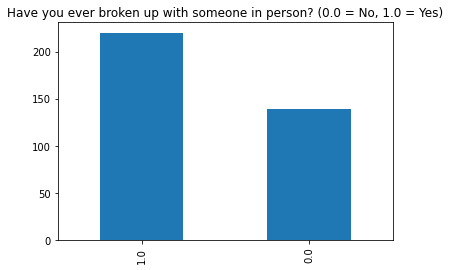

In [20]:
q2_df['bu_inperson'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Have you ever broken up with someone in person? (0.0 = No, 1.0 = Yes)');

In [21]:
q2_df['bu_inperson'].value_counts()

1.0    220
0.0    139
Name: bu_inperson, dtype: int64

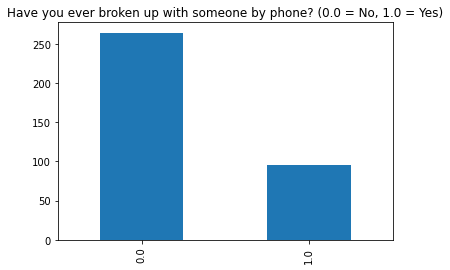

In [22]:
q2_df['bu_phone'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Have you ever broken up with someone by phone? (0.0 = No, 1.0 = Yes)');

In [23]:
q2_df['bu_phone'].value_counts()

0.0    264
1.0     95
Name: bu_phone, dtype: int64

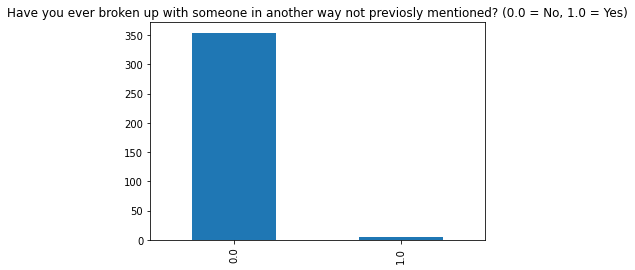

In [24]:
q2_df['bu_other'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Have you ever broken up with someone in another way not previosly mentioned? (0.0 = No, 1.0 = Yes)');

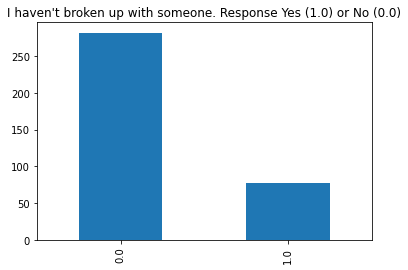

In [25]:
q2_df['bu_never'].value_counts(sort=True).plot(kind = 'bar')
plt.title("I haven't broken up with someone. Response Yes (1.0) or No (0.0)");

In [26]:
q2_df['bu_never'].value_counts()

0.0    282
1.0     77
Name: bu_never, dtype: int64

### Answer:

#### Most teenagers in our sample (80%) have already broken up with someone. The only break up method that a majority of teenagers have used is breaking up in person (61%). Breaking up by text (27%) and breaking up with by phone (26%) had the second and third highest amount of teenagers who have used these methods before. 

### Observation:

#### Interestingly, the answer to question two corresponds with question one. The only breakup method that a majority of teenagers used is also the only breakup up method that teenagers find appropriate. While no other methods were considered appropriate the method with the next lowest average appropriateness rating was breaking up by phone which also had a relatively high amount of teenagers who have used this method, compared to others. 

## Question 3: Are teenagers more likely to use an inappropriate breakup method if they have been on the receiving end of an inappropriate breakup method?

### Steps:
* Convert data types to interger for relevant columns
* Create row filters for teenagers who have been broken up with by phone and by text
* Create different plots showing the distribution of responses for different break up methods while also taking into account whether someone has been broken up with by an inappropriate method.  

##### Although most of the break up methods were inappropriate, I am only going to look at people who have been broken up by text or phone. These were the inappropriate methods that were used the most.

### Code:

In [27]:
# Within the columns relevant to this question, I converted the data types to interger to plot more easily. 
q2_df['dump_phone'] = pd.to_numeric(q2_df['dump_phone'],errors='coerce')
q2_df['dump_inperson'] = pd.to_numeric(q2_df['dump_inperson'],errors='coerce')
q2_df['dump_text'] = pd.to_numeric(q2_df['dump_text'],errors='coerce')

##### The following plots show the distribution of responses for different questions 

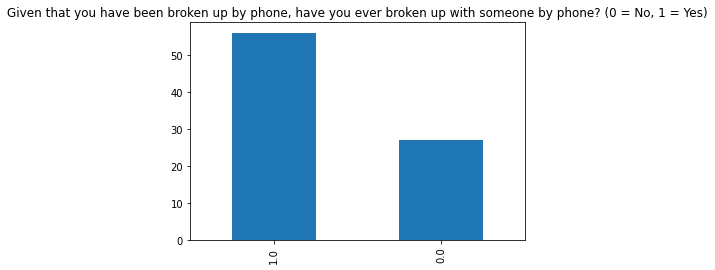

In [28]:
dump_phone_rf = q2_df['dump_phone'] == 1.0
dump_text_rf = q2_df['dump_text'] == 1.0
q2_df[dump_phone_rf]['bu_phone'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Given that you have been broken up by phone, have you ever broken up with someone by phone? (0 = No, 1 = Yes)');

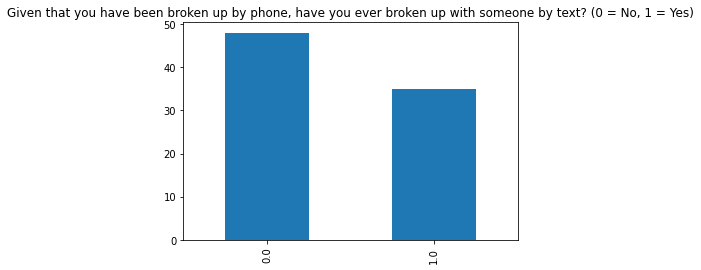

In [29]:
q2_df[dump_phone_rf]['bu_text'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Given that you have been broken up by phone, have you ever broken up with someone by text? (0 = No, 1 = Yes)');

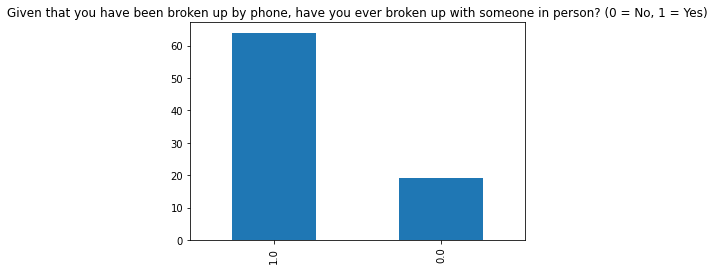

In [30]:
q2_df[dump_phone_rf]['bu_inperson'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Given that you have been broken up by phone, have you ever broken up with someone in person? (0 = No, 1 = Yes)');

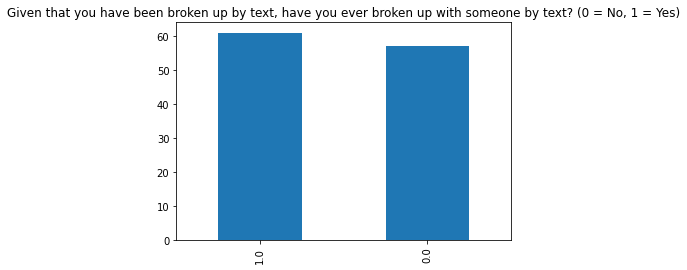

In [31]:
q2_df[dump_text_rf]['bu_text'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Given that you have been broken up by text, have you ever broken up with someone by text? (0 = No, 1 = Yes)');

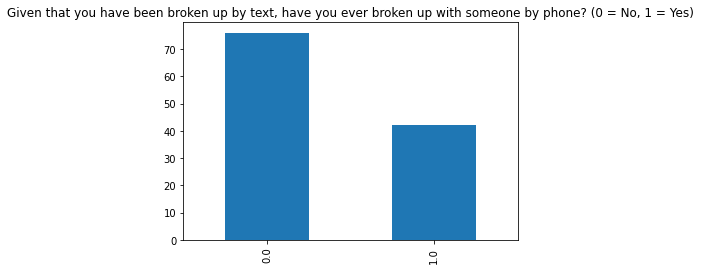

In [32]:
q2_df[dump_text_rf]['bu_phone'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Given that you have been broken up by text, have you ever broken up with someone by phone? (0 = No, 1 = Yes)');

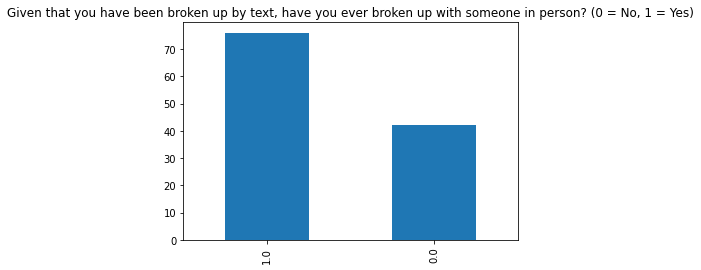

In [33]:
q2_df[dump_text_rf]['bu_inperson'].value_counts(sort=True).plot(kind = 'bar')
plt.title('Given that you have been broken up by text, have you ever broken up with someone in person? (0 = No, 1 = Yes)');

### Answer:
#### Of the teenagers who have been broken up by phone or text, the highest share of respondents still broke up with someone using the in-person method. However, a majority of teenagers who have been broken up with by phone call broke up with others using a phone call and a majority of teenagers who have been broken up by text broke up with others by text. 

### Observation: 
#### There does seem to be an association between those who have been broken up with using an inappropriate method and whether someone has used said inappropriate method on someone else.
#### Although the plots didn't show that a majority of teenagers who had been broken up with by an inappropriate method have used a differing inappropriate method the share of those who have used an inappropriate method was higher compared to the plots that included teenagers who hadn't experienced the chosen inappropriate method. 

### Question 4: Are there any meaningful differences in whether teenagers find breaking up in person the most appropriate method when we take into account different demographic characteristics? 

### Steps:
* Create new dataframe with relevant information
* Plot responses while grouping by different demographic columns

### Code:

In [34]:
# I created a new dataframe with all of my relevant survey question and demographic columns
dem_df = pd.read_csv('../data/Joy_Clean_Teen_Dating_dem.csv')
q4_df = pd.concat([q2_df,dem_df])
q4_df['Child_Gen_Long'].value_counts()

Female    545
Male      536
Name: Child_Gen_Long, dtype: int64

##### The following plots show the distribution of responses to "Have you ever broken up with someone in person?" for different demographic categories

In [35]:
q2_df.columns

Index(['bu_phone', 'bu_inperson', 'bu_text', 'bu_sm', 'bu_email',
       'bu_fbstatus', 'bu_smstatus', 'bu_image', 'bu_drift', 'bu_other',
       'bu_never', 'dump_phone', 'dump_inperson', 'dump_text'],
      dtype='object')

In [36]:
dem_df.columns

Index(['Unnamed: 0', 'ID', 'Sexuality_Long', 'Transgender_Long',
       'Parent_HOH_Long', 'Parent_Metro_Long', 'Parent_Internet_Long',
       'Child_Gen_Long', 'Parent_Gen_Long', 'Parent_Age', 'Child_Age',
       'Household_Size'],
      dtype='object')

In [37]:
q4_df.groupby('Child_Gen_Long')['bu_phone'].value_counts()

Series([], Name: bu_phone, dtype: int64)

### Answer:

### Observation:

### Question 5: Do teenagers still consider breaking up in person the most appropriate breakup method when we look at different demographic categories?

### Steps: 


### Answer:

### Observation: